### A pair of related problems:

1. Given a function rand5() that generates a random integer between 1 and 5 with uniform distribution, use it to write a rand7() function.   
2. Vice versa: Given rand7(), write rand5()

Lets do 2 first. There are probably several ways of doing this. Immediate thought is to for each nummber, call rand7() 5 times and then integer divide by 5.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def rand7_given():
    return np.random.randint(low=1,high=8)

In [45]:
def rand5():
    """rejection sampling - easy"""
    
    while True:
        candidate = rand7_given()
        if candidate <=5:
            return candidate
        
def rand5():
    """rejection sampling - attempt to speed up using pattern"""
    
    while True:
    
        c1 = rand7_given()
        c2 = rand7_given()
    
        #Generate numbers from 1 to 49 like this, due to rejection sampling
        #Recall this rule - row * (col-1)*n will generate random numbers from 1 to max(c1)*max(c2)
        idx = c1 + (c2 - 1)*7
        
        if idx <= 45:
            return 1 + (idx - 1) % 5
        
        c1 = idx - 45
        c2 = rand7_given()
            
        #Generate numbers from 1 to (4*7) = 28 like this, due to rejection sampling
        idx = c1 + (c2 - 1)*7
        if idx <= 25:
            return 1 + (idx - 1)%5
        
        c1 = idx - 25
        c2 = rand7_given()
        
        #Generate numbers from 1 to (3*7) = 21 like this, due to rejection sampling
        idx = c1 + (c2 - 1)*7
        
        if idx <= 20:
            return 1 + (idx - 1)%5
        
        #We have 21 in this case, which is rare
        
            

def test_dist(func_in,n_tests,bins=5):
    
    op = []
    for i in range(n_tests):
        op.append(func_in())
    
    plt.hist(op,bins=bins)

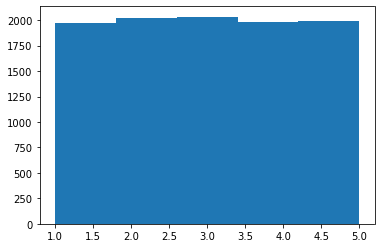

In [48]:
test_dist(rand5,10000,bins=5)